# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [2]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
<br> Intuitively, PCA will try to extract the complete different features (i.e. orthogonal to each other), and sort them in such a way that the most important extracted feature will be listed first, and so on. In this example, some of the original features are kind of correlated, such as Milk and Delicatessen, Fresh and Crocery, etc. And some seem indepedent from each other, such as Grocery and Detergents_Paper. And Detergents_Paper seems independent from all other features. Grocery seems like an overall feature of Fresh, Milk, Frozen and Delicatessen. So PCA might try to extract a new feature set with the first two something close to Delicatessen and Grocery.

### PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


<Container object of 6 artists>

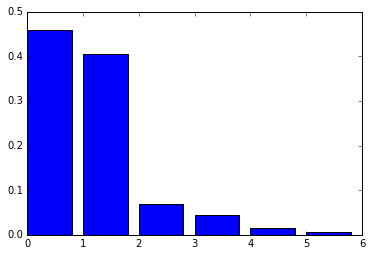

In [3]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
n_components = 6
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data.values)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_
plt.bar(range(0, n_components), pca.explained_variance_ratio_)

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: <br>
As expected in my Answer 1, there are two principal components after running PCA, the first one explains 46% of the variance of the data, and the second one explains 41%. The remaining ones are just minor features. Therefore, I would use 2 dimensions for the rest of the analysis. 

In [4]:
std = StandardScaler()
data_std = std.fit_transform(data.values)
pca = PCA(n_components=6)
data_pca = pca.fit_transform(data_std)

/home/ares/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ares/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


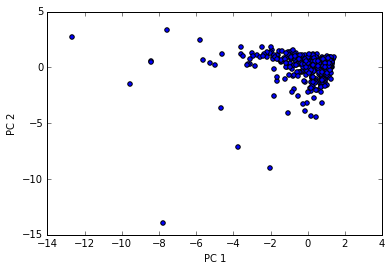

In [5]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], marker = 'o')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [6]:
data_pca_df = pd.DataFrame(data_pca[:, 0:4], columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])
data_pca_df = pd.concat((data_pca_df, data), axis=1)
data_pca_df.head()

,PC 1,PC 2,PC 3,PC 4,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-0.193291,0.305100,-0.140878,-0.486432,12669,9656,7561,214,2674,1338
1,-0.434420,0.328413,0.319007,-0.178830,7057,9810,9568,1762,3293,1776
2,-0.811143,-0.815096,1.523416,-1.254082,6353,8808,7684,2405,3516,7844
3,0.778648,-0.652754,0.163012,0.380060,13265,1196,4221,6404,507,1788
4,-0.166287,-1.271434,0.066279,-0.826227,22615,5410,7198,3915,1777,5185


In [7]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

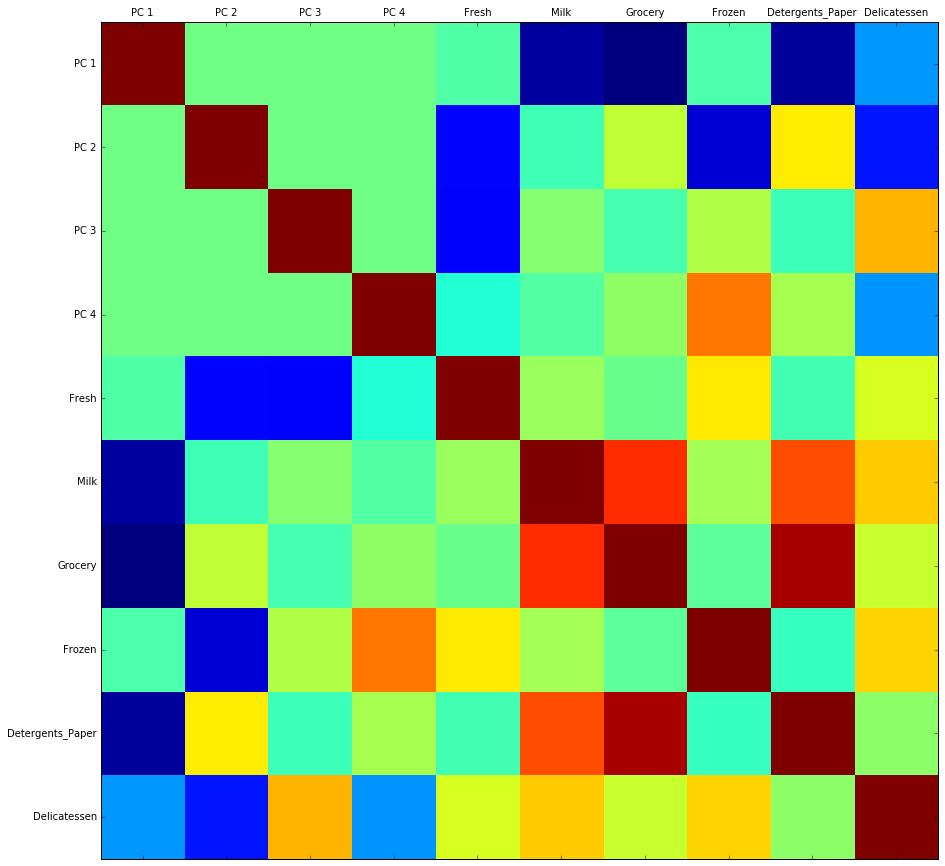

In [8]:
plot_corr(data_pca_df, size=15)

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: <br>
The dimensions seem to represent the most important two features constructed. Although it is difficult to describe the exact meaning of these two features, it combined the correlated features in the original feature list, and constructed a new set of features orthogonal to each other. 
<br>
From the correlation plot above, it seems like the first principal component is highly correlated with "Milk", "Grocery" and "Detergents Paper", while the second principal component captures information about "Fresh", "Frozen" and "Delicatessen". These two "PC"s captures all the information from the data, which makse sense since "PC 3" and "PC 4" have weaker correlations with the original data set.
<br>
PCA can be used for dimensionality reduction if the original dimension is high, and many features are correlated with data noises. PCA can also be used for inspection. Sometimes, PCA can also be used for feature selection. We can first use PCA as a pre_process step to fit and transform our data. Then we could use the most important n number of features for the training. 

### ICA

In [9]:
means = pd.DataFrame({'Fresh': [12000.30], 
                      'Milk': [5796.27], 
                      'Grocery': [7951.28], 
                      'Frozen': [3071.93], 
                      'Detergents_Paper': [2881.49], 
                      'Delicatessen': [1524.87]})


In [10]:
columns = data.columns
centered_data = pd.DataFrame(data[columns].values - means[columns].values,columns = columns)
centered_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,668.7,3859.73,-390.28,-2857.93,-207.49,-186.87
1,-4943.3,4013.73,1616.72,-1309.93,411.51,251.13
2,-5647.3,3011.73,-267.28,-666.93,634.51,6319.13
3,1264.7,-4600.27,-3730.28,3332.07,-2374.49,263.13
4,10614.7,-386.27,-753.28,843.07,-1104.49,3660.13


In [11]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA()
data_ica = ica.fit_transform(centered_data)
# Print the independent components
print ica.components_

[[  1.49047209e-07   9.85272930e-06  -5.88535426e-06  -3.57488402e-07
    3.39550467e-06  -6.05223997e-06]
 [ -2.76232765e-07   2.41852029e-06   1.16887758e-05  -1.48115124e-06
   -2.80998758e-05  -5.68358141e-06]
 [ -3.87876423e-07  -2.09382639e-07  -5.92796268e-07  -5.21446987e-07
    4.96770491e-07   1.80809771e-05]
 [ -3.97818346e-06   8.66030565e-07   7.47756627e-07   6.68667777e-07
   -2.31277207e-06   9.87670908e-07]
 [ -8.64064594e-07  -1.45719299e-07   7.68141133e-07   1.11471810e-05
   -5.36768492e-07  -5.94827038e-06]
 [  2.05129092e-07  -1.69570750e-06   7.00481119e-06   3.30947189e-07
   -2.24923347e-06  -1.81721542e-06]]


In [12]:
data_ica_df = pd.DataFrame(data_ica, columns=['IC 1', 'IC 2', 'IC 3', 'IC 4', 'IC 5', 'IC 6'])
data_ica_df = pd.concat((data_ica_df, data), axis=1)
data_ica_df.head()

,IC 1,IC 2,IC 3,IC 4,IC 5,IC 6,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.041874,0.015714,-0.002828,-0.001225,-0.032075,-0.009281,12669,9656,7561,214,2674,1338
1,0.029640,0.018920,0.005547,0.022771,-0.011388,0.001689,7057,9810,9568,1762,3293,1776
2,-0.005447,-0.047037,0.116637,0.029202,-0.041127,-0.021269,6353,8808,7684,2405,3516,7844
3,-0.034029,0.005215,0.004525,-0.003825,0.033565,-0.012104,13265,1196,4221,6404,507,1788
4,-0.023994,-0.003686,0.061601,-0.036392,-0.021475,-0.006332,22615,5410,7198,3915,1777,5185


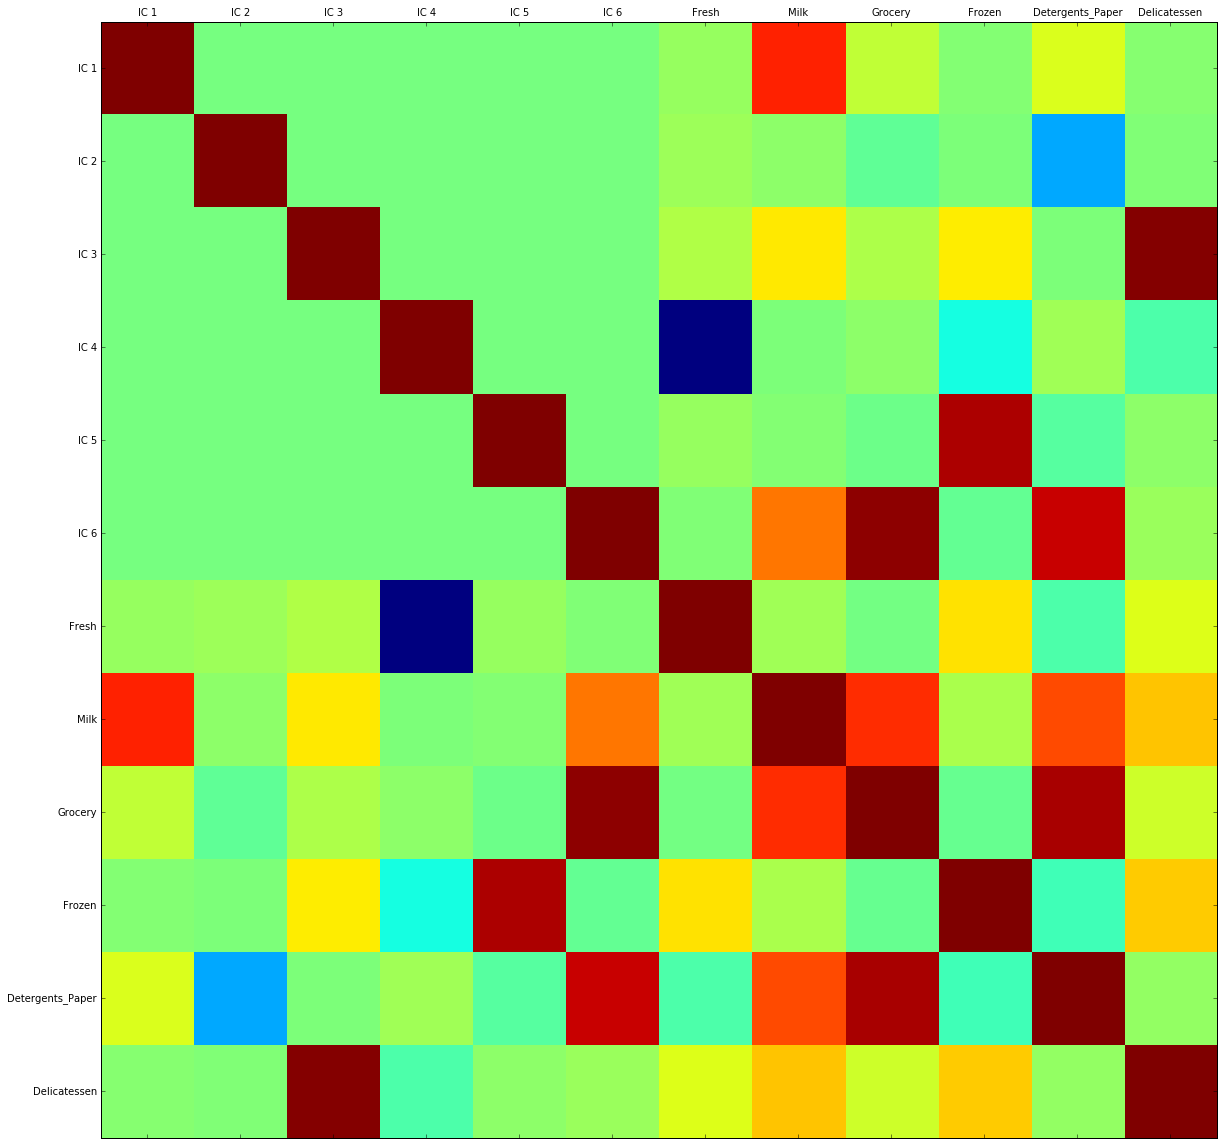

In [13]:
plot_corr(data_ica_df, size = 20)

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer:
<br>
The major difference between the two algorithms might be that K Means defines a "hard assignment", while the Gaussian Mixture Models defines "soft assignment". Therefore, if there are cases that one might need to know the probability, or confidence/uncertainty, of a data point belonging to a particular cluster, Gaussian Mixture Models is more preferrable. <br> 
<br> On the other hand, if one does not need the soft assignment, K Means algorithm normally runs faster than Gaussian Mixture Model. Also, it might be easier to understand how it works under the hood.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [18]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [19]:
import math
log_data = data.applymap(lambda x: math.log(x,2))
std = StandardScaler()
log_data_std = std.fit_transform(log_data)
reduced_log_data_std = PCA(n_components=2).fit_transform(log_data_std)
reduced_log_data_std[:10]

array([[ 1.37937462, -0.30383791],
       [ 1.43480713,  0.53814669],
       [ 1.50395108,  1.22615334],
       [-0.82413256,  1.20577046],
       [ 0.79738815,  1.75698625],
       [ 0.88553197,  0.13083381],
       [ 0.60531757, -0.45612922],
       [ 1.14750348,  0.60637654],
       [ 0.53151843, -0.62521449],
       [ 2.1894146 ,  0.32762966]])

In [20]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data_std)
print reduced_data[:10]  # print upto 10 elements

[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]
 [-0.16628726 -1.27143372]
 [ 0.15616993  0.29514099]
 [ 0.3352884   0.52500326]
 [-0.14058643  0.23099269]
 [ 0.51731954  0.65936283]
 [-1.59210908  0.74101133]]


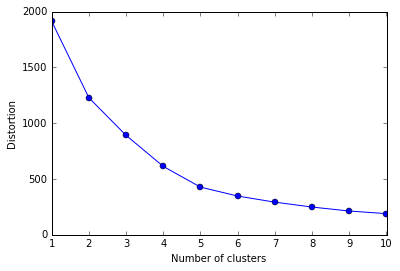

In [21]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(reduced_data)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

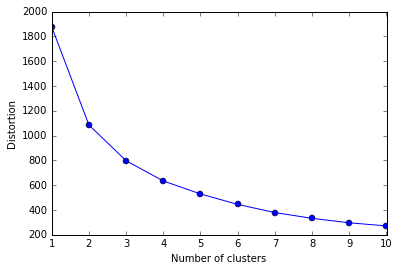

In [22]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(reduced_log_data_std)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [23]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=2, n_jobs=-1)
clusters.fit(reduced_data)

print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=-1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [24]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [25]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_ 
print centroids

[[ 0.41858927 -0.04642563]
 [-3.67428358  0.40751388]]


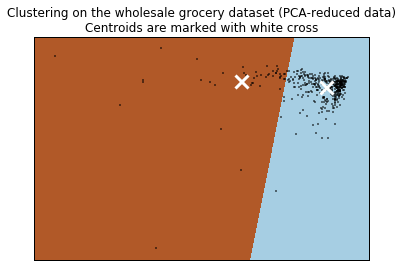

In [26]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [27]:
import time
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

def cluster(clusterer):
    clusterer.fit(reduced_data)
    clusters = clusterer
    print clusters
    return clusters

# Plot the decision boundary by building a mesh grid to populate a graph.

def plot_boundary(clusters):
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    return Z,xx,yy,x_min,x_max,y_min,y_max

# TODO: Find the centroids for KMeans or the cluster means for GMM 

def cluster_means(clusters, func_name):
    centroids = getattr(clusters, func_name)
    print centroids
    return centroids


# Put the result into a color plot
def color_plot(clusters, Z,xx,yy,x_min,x_max,y_min,y_max,centroids):
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
def cluster_and_plot(clusterer,func_name):
    clusters = cluster(clusterer)
    Z,xx,yy,x_min,x_max,y_min,y_max = plot_boundary(clusters)
    centroids = cluster_means(clusters,func_name)
    color_plot(clusters,Z,xx,yy,x_min,x_max,y_min,y_max,centroids)
    
def benchmark(clusterer, func_name):
    num_times = 1
    total = 0.0
    for i in range(num_times):
        start = time.clock()
        cluster_and_plot(clusterer, func_name)
        end = time.clock()
        diff = end - start
        total += diff
    print "Benchmark:", total/num_times, "seconds"

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
[[ 0.46035114  0.09287265]
 [-2.48123321 -0.50057157]]


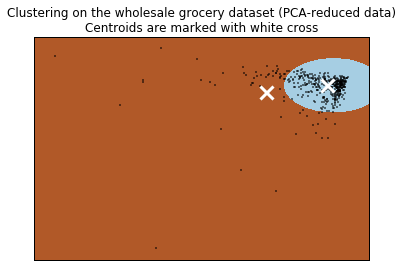

Benchmark: 2.800014 seconds


In [32]:
benchmark(GMM(n_components=2),'means_')

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
[[ 0.41858927 -0.04642563]
 [-3.67428358  0.40751388]]


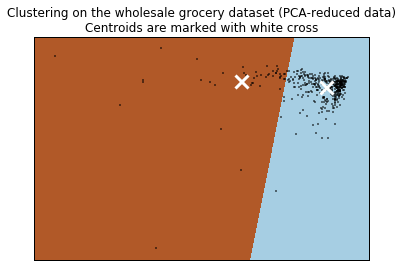

Benchmark: 1.474412 seconds


In [29]:
benchmark(KMeans(n_clusters=2), 'cluster_centers_')

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
[[ 0.81390937 -0.09438154]
 [-2.93976839 -1.74986101]
 [-0.73128146  0.62513369]]


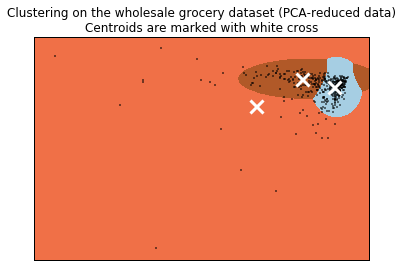

Benchmark: 3.756424 seconds


In [34]:
benchmark(GMM(n_components=3), 'means_')

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
[[ -3.52778282   0.92939702]
 [  0.42941908  -0.02740804]
 [ -4.51308525 -10.04070335]]


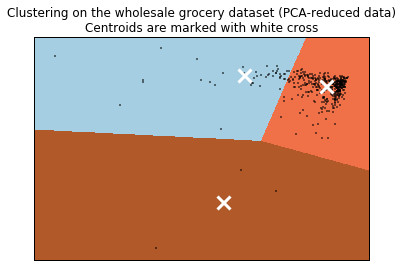

Benchmark: 1.869809 seconds


In [35]:
benchmark(KMeans(n_clusters=3), 'cluster_centers_')

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 
<br>
Central Objects are the centroids for each cluster. Since K Means model will take the average value of the data points as the centroids, so each centroid represents the average situation of the customer for each cluster. 

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: <br>
PCA is one the most important unsupervised learning techniques that is useful for dimensionality reduction, data noise filtering, feature selection, visualization, etc. While PCA works well only for data that has linearly seperable boundaries, other tehcniques, e.g. Auto Encoder, exist for more complex data. This pre-processing step using either PCA or other more advanced techniques is important since it will give us the first insights about the data. For example, if we take a first 2 or three principal components of the data and plot them, we might be able to see the replationship in low dimensions. 
<br> <br>
Clustering algorithms such as K Means and GMM are also very useful, since in real world, most data are unlabeled data. It is good if we could first cluster them into a couple of groups, then use other techniques in subervised learning for further training.

**9)** How would you use that technique to help the company design new experiments?

Answer: 
<br>
After using PCA with 2 components, and a clustering model such as K Means with two or three clusters, I would suggest the company to collect complaints from the customers. Then I would like to see which cluster include most of the complaints, and what is the distribution of the complaints within one cluster. If most of the complaints are from a single cluster, we can conclude that the new delivery service would impact more on those customers belonging to that cluster. The company then could perhaps make some changes about the service to that specific cluster. If each cluster contains similar amount of complaints, it probably means that the new service would have impacted on all types of the customers. If this is the case, maybe the new service is not a good idea.

**10)** How would you use that data to help you predict future customer needs?

Answer: 
<br> For a new customer, we first can predict which cluster he or she belongs to. Then we can see if that cluster gets most of the complaints. Once these are done, we will have enough information about what kind of delivery service the new customer might need and provide the best possible service to that customer.